In [1]:
%matplotlib inline
import tensorflow as tf
import strawberryfields as sf
from strawberryfields.ops import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# I used some code from this repository: https://github.com/XanaduAI/quantum-learning

eng, q = sf.Engine(1)

depth = 5
passive_sd = 0.1
active_sd = 0.001
batch_size = 32

x_ = tf.placeholder(tf.float32, shape=[batch_size ,])

sq_r = tf.Variable(tf.random_normal(shape=[depth], stddev=active_sd))
sq_phi = tf.Variable(tf.random_normal(shape=[depth], stddev=passive_sd))


d_r = tf.Variable(tf.random_normal(shape=[depth], stddev=active_sd))
d_phi = tf.Variable(tf.random_normal(shape=[depth], stddev=passive_sd))


r1 = tf.Variable(tf.random_normal(shape=[depth], stddev=passive_sd))
r2 = tf.Variable(tf.random_normal(shape=[depth], stddev=passive_sd))

kappa = tf.Variable(tf.random_normal(shape=[depth], stddev=active_sd))

with eng:
    Dgate(x_) | q
    
    for i in range(depth):
        Rgate(r1[i]) | q
        Sgate(sq_r[i], d_phi[i]) | q
        Rgate(r2[i]) | q
        Dgate(d_r[i], d_phi[i]) | q
        Kgate(kappa[i]) | q

In [3]:
state = eng.run('tf', cutoff_dim=10, eval=False, batch_size=batch_size)
output = state.quad_expectation(0, eval=False)[0]

In [4]:
cost_op = tf.losses.mean_squared_error(tf.sin(np.pi * x_), output)
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
train_step = optimizer.minimize(cost_op)

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

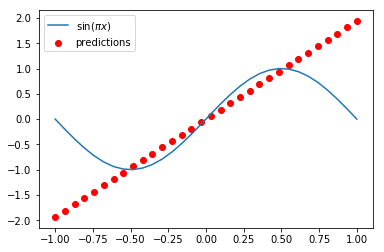

In [6]:
x = np.linspace(-1, 1, num=batch_size)
y = sess.run(output, feed_dict={x_: x})
plt.scatter(x, y, color='red', label='predictions')
plt.plot(x, np.sin(np.pi*x), label=r'$\sin(\pi x)$')
plt.legend()

In [7]:
n_steps = 500

cost_hist = []
for step in range(n_steps):
    x = np.random.uniform(-1, 1, size=batch_size) 
    cost, _ = sess.run([cost_op, train_step], feed_dict={x_: x})
    cost_hist.append(cost)
    if step % 50 == 0:
        print(cost)

0.4251451
0.106350556
0.11664895
0.062014386
0.06089666
0.053732745
0.035934877
0.023872264
0.028691988
0.019830972


In [8]:
x = np.linspace(-1, 1, num=32)
y = sess.run(output, feed_dict={x_: x})

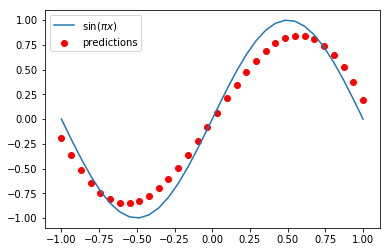

In [9]:
plt.scatter(x, y, color='red', label='predictions')
plt.plot(x, np.sin(np.pi*x), label=r'$\sin(\pi x)$')
plt.legend()